<a href="https://colab.research.google.com/github/ShreyasSubhedar/Deep_Learning/blob/master/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing dataset of breast cancer
import sklearn.datasets
# importing numpy
import numpy as np
# importing pandas as pd
import pandas as pd
# import matplotlib for plotting graphs
import matplotlib.pyplot as plt
#imporing seaborn to give neet look 
import seaborn as sns
# importing metrics 
from sklearn.metrics import accuracy_score
#importing the train_test 
from sklearn.model_selection import train_test_split
#importing the different libraries to get video animation task done
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML


Class MPNeuron


In [0]:
class MPNeuron:

  def __init__(self):
    self.b = None

  def model(self,x):
    return (sum(x) >= self.b)

  def predict(self,X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def accuracy(self, Y_pred, Y_test):
    print('Highest accuracy for testing data  is ', accuracy_score(Y_pred,Y_test)*100)

  def fit(self,X,Y):
    accuracy ={}

    for b in range(X.shape[1]+1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred,Y) 
    
    best_b = max(accuracy, key=accuracy.get)
    self.b = best_b
    
    print('Optical value of b is',best_b)
    print('Highest accuracy for training data is ', accuracy[best_b]*100)
    w=[]
    for q,p in accuracy.items():
      w.append(p)
    plt.plot(np.asarray(w))
    plt.xlim(1,30)
    plt.ylim(0,1)
    plt.title('ANS:- exercise 3')
    plt.show()
    return b


Class : Perceptron
Exxercise 4:
The weight initialization is changed to np.random with np.radom.seed(0)  to reproduce the output

In [0]:
class Perceptron:
  def __init__(self):    #this contains parameters
    self.w = None
    self.b= None

  def model(self,x):    # this contain model defination 
    return 1 if (np.dot(self.w,x)>=self.b) else 0
  
  def predict(self,X):     # this will invoke the model (mainly used when we have the right paramters)
    Y=[]
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y,epoch=1,learningRate=1):    # the learning algorithm 
    # self.w= np.ones(X.shape[1]) here it is not a good practice to write an algorithum by starting the initialisation of variables with 1
    np.random.seed(0)
    self.w = np.random.randint(1, size = X.shape[1])
    self.b = 0
    accuracy = {}
    maxAccuracy=0
    weightMatrix=[]
    for i in range(epoch):
      for x,y in zip(X,Y):
        Y_pred = self.model(x)
        if y==1 and Y_pred == 0:
          self.w = self.w + learningRate*x
          self.b = self.b + learningRate*1
        elif y==0 and Y_pred == 1:
          self.w = self.w - learningRate*x
          self.b = self.b - learningRate*1
      weightMatrix.append(self.w)
      accuracy[i] = accuracy_score(self.predict(X),Y)
      if(maxAccuracy<accuracy[i]):
        maxAccuracy = accuracy[i]
        checkPointW = self.w;
        checkPointB = self.b; 
    self.w = checkPointW
    self.b= checkPointB
    a = np.asarray(list(accuracy.values()))
    plt.plot(a)
    plt.show()
    return np.array(weightMatrix)

Preprocessing data (initial)

In [0]:
# Getting data to the varialble
breast_cancer = sklearn.datasets.load_breast_cancer()
# Creating data frame
data = pd.DataFrame(breast_cancer.data,columns= breast_cancer.feature_names)
Y = breast_cancer.target
# 1st parameter = data dataframe
# 2nd parameter = target dataframe
# 3rd parameter = 90% ttraining split 10% test split
# 4th parameter = deterministic split always give same o/p  
X_train, X_test, Y_train, Y_test = train_test_split(data,Y,test_size=0.1, stratify = Y ,random_state=1)

#convert the dataframe to numpy arrays for calulation
X_test =X_test.values       # for Perceptron
X_train = X_train.values     #for Perceptron 

Exercise 1: Play with test-train split and check the change in accurancy.

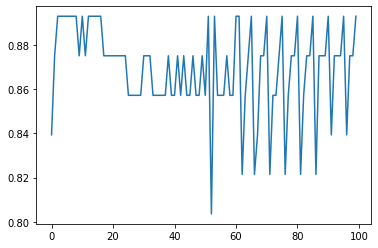

Accuracy of Perceptron model after changing the train-test split  90.05847953216374


In [68]:
perceptron = Perceptron()
weightMatrix = perceptron.fit(X_train,Y_train,100,0.5)
print('Accuracy of Perceptron model after changing the train-test split ',accuracy_score(perceptron.predict(X_test),Y_test)*100)

---------------------------------------------------------------------------------

**ANS** Exercise 1:
$
accurancy \ \alpha$	$sizeof(dataset)$	

If dataset is smaller the accuracy will be lower.



---------------------------------------------------------------------------------

Exercise 2: Use different types of binarisation

In [0]:
# Getting data to the varialble
breast_cancer1 = sklearn.datasets.load_breast_cancer()
# Creating data frame
data1 = pd.DataFrame(breast_cancer1.data,columns= breast_cancer1.feature_names)
Y1 = breast_cancer.target

# using mean value binarisation technique to check whether accuracy will decrease or increase.
for i in data1.columns:
  data1[i]= (data1[i]< data1[i].mean()).astype(int)
# 1st parameter = data dataframe
# 2nd parameter = target dataframe
# 3rd parameter = 90% ttraining split 10% test split
# 4th parameter = deterministic split always give same o/p  
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(data1,Y1,test_size=0.1, stratify = Y ,random_state=1)
#convertind dataframes to numpy
X_train1 =X_train1.values
X_test1 =X_test1.values

Optical value of b is 15
Highest accuracy for training data is  90.625


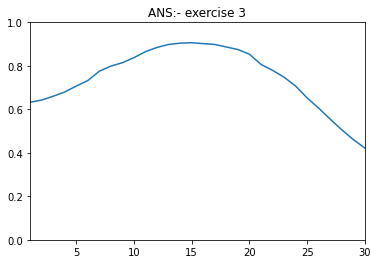

Highest accuracy for testing data  is  89.47368421052632


In [72]:
mpneuron = MPNeuron()
mpneuron.fit(X_train1,Y_train1)
mpneuron.accuracy(mpneuron.predict(X_test1),Y_test1)

--------------------------------------------------------------------------------

**ANS** Exercise 2:
accuracy of MPNeuron model is increased by 14 % in training dataset and 12% in testing data set by proper binarisation.

--------------------------------------------------------------------------------

Exercise 3: See the variation of accuracy over b in MPNeuron (training and testing) 

**ANS** Exercise 3:

Training accuracy:-
Optical value of b is 15
Highest accuracy for training data is  90.625


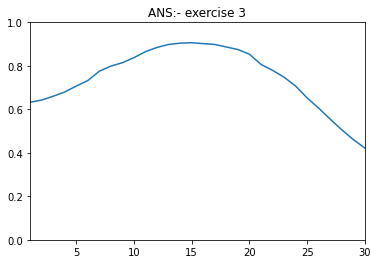

Test accuracy:-
Optical value of b is 15
Highest accuracy for training data is  89.47368421052632


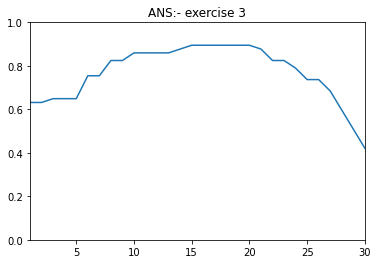

30

In [73]:

print('Training accuracy:-')
mpneuron.fit(X_train1,Y_train1)
print('Test accuracy:-')
mpneuron.fit(X_test1,Y_test1)


Exercise 4: Playing with hyperparameter of perceptron and come up with some colclusion.

when epoch =1


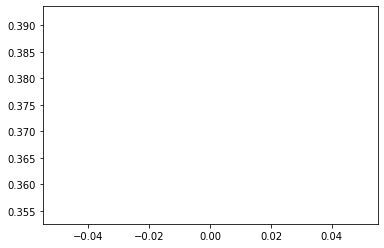

Accuracy of Perceptron model after changing the epoch  37.3046875
when epoch =1000


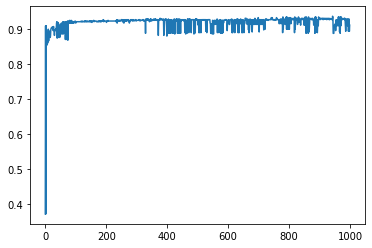

Accuracy of Perceptron model after changing the epoch  93.75
when epoch =100000


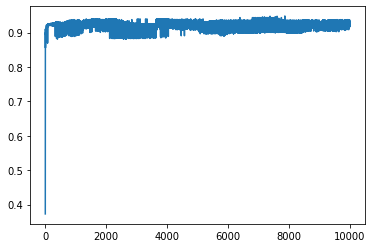

Accuracy of Perceptron model after changing the epoch  94.7265625


In [74]:
print('when epoch =1')
weightMatrix = perceptron.fit(X_train,Y_train,1,0.5)
print('Accuracy of Perceptron model after changing the epoch ',accuracy_score(perceptron.predict(X_train),Y_train)*100)
print('when epoch =1000')
weightMatrix = perceptron.fit(X_train,Y_train,1000,0.5)
print('Accuracy of Perceptron model after changing the epoch ',accuracy_score(perceptron.predict(X_train),Y_train)*100)
print('when epoch =10000')
weightMatrix = perceptron.fit(X_train,Y_train,10000,0.5)
print('Accuracy of Perceptron model after changing the epoch ',accuracy_score(perceptron.predict(X_train),Y_train)*100)

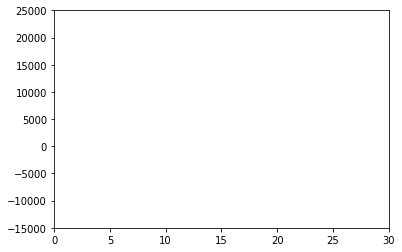

In [58]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, weightMatrix.shape[1]))
ax.set_ylim((-15000, 25000))

line, = ax.plot([], [], lw=2)

In [0]:
# animation function. This is called sequentially
def animate(i):
    x = np.array(list(range(weightMatrix.shape[1])))
    y = weightMatrix[i, :]
    line.set_data(x, y)
    return (line,)

In [0]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=20, blit=True)

In [65]:
#converting the whole prcoess to the html5video
HTML(anim.to_html5_video())


when learning rate =1


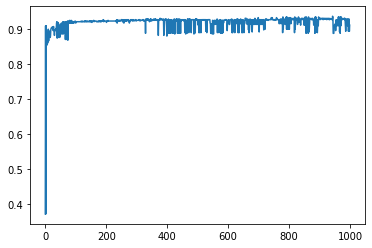

Accuracy of Perceptron model after changing the epoch  93.75
when learning rate = 0.5


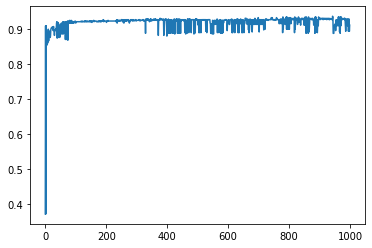

Accuracy of Perceptron model after changing the epoch  93.75
when learning rate =10000


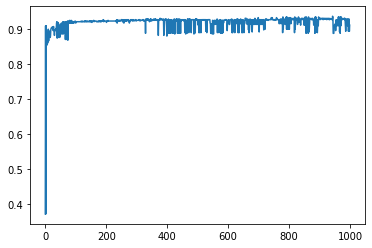

Accuracy of Perceptron model after changing the epoch  93.75


In [62]:
print('when learning rate =1')
weightMatrix = perceptron.fit(X_train,Y_train,1000,)
print('Accuracy of Perceptron model after changing the epoch ',accuracy_score(perceptron.predict(X_train),Y_train)*100)
print('when learning rate = 0.5')
weightMatrix = perceptron.fit(X_train,Y_train,1000,0.5)
print('Accuracy of Perceptron model after changing the epoch ',accuracy_score(perceptron.predict(X_train),Y_train)*100)
print('when learning rate =10000')
weightMatrix = perceptron.fit(X_train,Y_train,1000,10000)
print('Accuracy of Perceptron model after changing the epoch ',accuracy_score(perceptron.predict(X_train),Y_train)*100)

In [66]:
#converting the whole prcoess to the html5video
HTML(anim.to_html5_video())


**ANS** Exercise 4 : 

Hyper-parameter 1: Epoch 

a) If epoch is less then accuracy will be less

b) If Epoch is high then the model will be train numorous time , hence we'll face the situation of overfitting which might decrease the testing 
dataset's accuracy.

Hyper-parameter 2: Learning Rate 


a) if LR is very small then variation of weight is negligible but may causes increase in epoch.


b) if LR is very large then variation of weight
is more clear, which may leads to decrease in accuracy.

-----------------------------------------------------------------------------------------------
